In [148]:
from __future__ import print_function, division
import geopandas as gp
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import os
import json
import seaborn
import statsmodels.api as sm

# s = json.load( open(os.getenv('PUI2016')+'/fbb_matplotlibrc.json') )
# pl.rcParams.update(s)
if os.getenv("PUIDATA") is None:
    print ("$PUIDATA to point to set PUIdata dir")

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Can we measure and predict energy use based on observables that are easy to acquire?

In [93]:
nrg = pd.read_csv(os.getenv("PUIDATA") + '/Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv')
nrg.head()

,Record Number,"NYC Borough, Block, and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Zip Code,DOF Benchmarking Submission Status,...,Automatic Water Benchmarking Eligible,Reported Water Method,ENERGY STAR Score,Total GHG Emissions(MtCO2e),Direct GHG Emissions(MtCO2e),Indirect GHG Emissions(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings
0,12086,1.000410e+09,NaN,1000410001,1001007,NaN,NaN,Manhattan,NaN,BBL not valid,...,NaN,NaN,Not Available,NaN,NaN,NaN,918919,NaN,Office,NaN
1,14354,4.021460e+09,NaN,NaN,NaN,63-10,108 STREET,Queens,11375.0,No Submission Matched to BBL,...,Yes,None,NaN,NaN,NaN,NaN,NaN,82730.0,NaN,1.0
2,12150,2.027620e+09,NaN,2027620097,2006460,NaN,NaN,Bronx,NaN,BBL not valid,...,NaN,NaN,Not Available,NaN,NaN,NaN,64200,NaN,Multifamily Housing,NaN
3,12590,1.006700e+09,NaN,NaN,NaN,201,11 AVENUE,Manhattan,10001.0,No Submission Matched to BBL,...,No,None,NaN,NaN,NaN,NaN,NaN,440360.0,NaN,1.0
4,15591,2.048300e+09,NaN,2048300034,2063117,NaN,NaN,Bronx,NaN,Not on Covered Buildings List,...,NaN,None,Not Available,NaN,NaN,NaN,50000,NaN,Multifamily Housing,NaN


In [94]:
get_ipython().system("curl -O 'http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mn_mappluto_16v1.zip'")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11.6M  100 11.6M    0     0  75.8M      0 --:--:-- --:--:-- --:--:-- 79.4M


In [95]:
os.system("mv mn_mappluto_16v1.zip " + os.getenv("PUIDATA"))

0

In [96]:
os.system("unzip " + os.getenv("PUIDATA") + '/' + "mn_mappluto_16v1.zip")

256

In [97]:
bsize = gp.GeoDataFrame.from_file(os.getenv("PUIDATA") + '/manhattan/MNMapPLUTO.shp')
bsize.head()

,APPBBL,APPDate,Address,AllZoning1,AllZoning2,AreaSource,AssessLand,AssessTot,BBL,BldgArea,...,YearAlter2,YearBuilt,ZMCode,ZipCode,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,ZoneMap,geometry
0,0.000000e+00,None,1592 2 AVENUE,C1-9/TA,None,2,468000.0,1435950.0,1.015450e+09,10885,...,0,1920,None,10028,C1-9,None,None,None,9a,"POLYGON ((997277.2344000041 221816.0936000049,..."
1,1.007230e+09,11/30/2006,263 9 AVENUE,C1-5/R8,None,2,539984.0,11879993.0,1.007238e+09,89203,...,0,1914,None,10001,R8,None,None,None,8d,"POLYGON ((984164.5626000017 211846.0703999996,..."
2,0.000000e+00,None,310 EAST 109 STREET,R7A,None,2,140102.0,343271.0,1.016800e+09,12000,...,0,1910,None,10029,R7A,None,None,None,6b,"POLYGON ((1000742.195800006 227910.6640000045,..."
3,0.000000e+00,None,720 PARK AVENUE,R10/PI/LH-1A,R8B,2,5040000.0,30591900.0,1.013850e+09,203490,...,2006,1928,None,10021,R10,R8B,None,None,8c,"POLYGON ((994007.6886000037 219880.428399995, ..."
4,0.000000e+00,None,3 WEST 83 STREET,R8B,R10A,2,437850.0,1267200.0,1.011970e+09,13839,...,0,1900,None,10024,R8B,R10A,None,None,5d,"POLYGON ((992273.6850000024 224863.4904000014,..."


In [98]:
#bsize.columns

In [99]:
bsize.drop([u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidFAR',
       u'RetailArea', u'SHAPE_Area', u'SHAPE_Leng',    u'SPDist1',
          u'SPDist2',    u'Sanborn',  u'SanitBoro',  u'SanitDist',
         u'SanitSub', u'SchoolDist',  u'SplitZone',  u'StrgeArea',
           u'TaxMap',  u'Tract2010',
          u'Version',     u'XCoord',     u'YCoord', u'YearAlter1',
       u'YearAlter2',  u'YearBuilt',     u'ZMCode',    u'ZipCode',
        u'ZoneDist1',  u'ZoneDist2',  u'ZoneDist3',  u'ZoneDist4',
          u'ZoneMap',   u'geometry'], axis=1, inplace=True)

In [100]:
bsize.columns

Index([u'BBL', u'UnitsRes', u'UnitsTotal'], dtype='object')

In [101]:
os.path.isfile(os.getenv("PUIDATA") + "/Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")

True

In [102]:
os.path.isfile(os.getenv("PUIDATA") + "/manhattan/MNMapPLUTO.shp")

True

In [103]:
nrg.rename(columns={'NYC Borough, Block, and Lot (BBL)': 'BBL'}, inplace=True)
# nrg.head()

In [104]:
nrg.columns

Index([u'Record Number', u'BBL', u'Co-reported BBL Status',
       u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Zip Code',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff433a39bd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ff44ac2bf10>]], dtype=object)

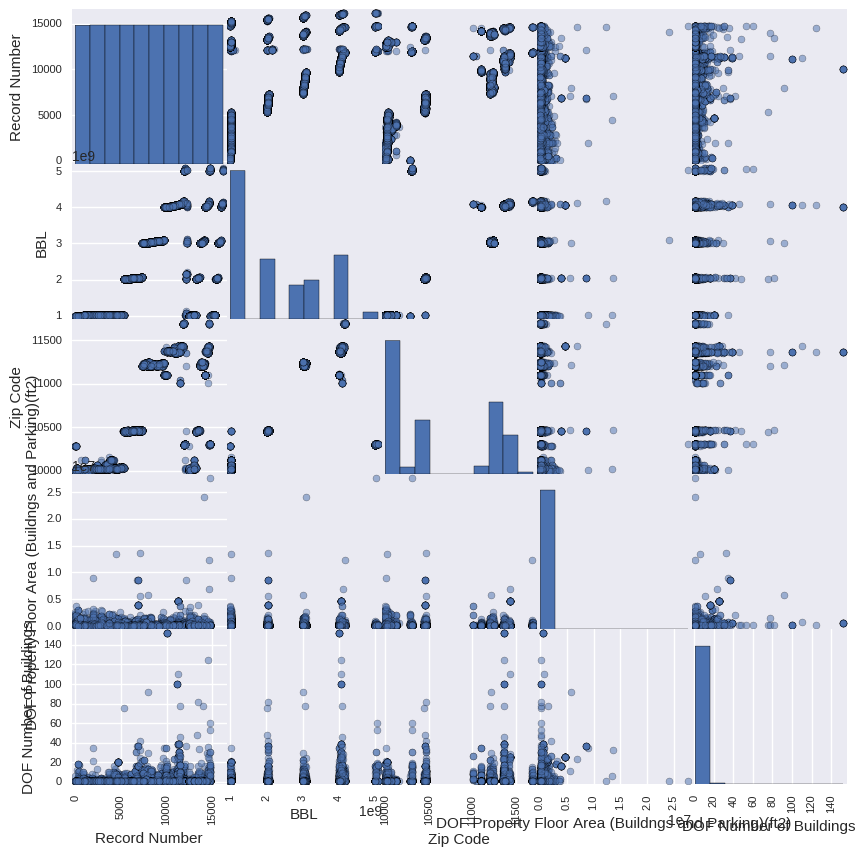

In [105]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix (nrg, s=100, figsize=(10, 10))

### columns from bsize that we want to keep are: BBL
### columns from nrg that we want to keep are: BBL, Site EUI(kBtu/ft2), Reported Property Floor Area (Building(s)) (ft²)

In [106]:
nrg.drop([u'Record Number', u'Co-reported BBL Status',
       u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Zip Code',
       u'DOF Benchmarking Submission Status',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings'], axis=1, inplace=True)

In [107]:
nrg.head()

,BBL,Site EUI(kBtu/ft2),Municipally Supplied Potable Water - Indoor Intensity (gal/ft²),Reported Property Floor Area (Building(s)) (ft²)
0,1.000410e+09,NaN,Not Available,918919
1,4.021460e+09,NaN,NaN,NaN
2,2.027620e+09,NaN,Not Available,64200
3,1.006700e+09,NaN,NaN,NaN
4,2.048300e+09,NaN,Not Available,50000


In [108]:
nrg.columns

Index([u'BBL', u'Site EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Reported Property Floor Area (Building(s)) (ft²)'],
      dtype='object')

In [109]:
nrg.drop(['Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)'], axis=1, inplace=True)

In [110]:
nrg.head()

,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²)
0,1.000410e+09,NaN,918919
1,4.021460e+09,NaN,NaN
2,2.027620e+09,NaN,64200
3,1.006700e+09,NaN,NaN
4,2.048300e+09,NaN,50000


In [111]:
bblnrgdata = pd.merge(nrg, bsize, on=['BBL'])
bblnrgdata.head()

,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),UnitsRes,UnitsTotal
0,1.006700e+09,NaN,NaN,0,1
1,1.004370e+09,NaN,NaN,0,4
2,1.013110e+09,125.4,330000,0,56
3,1.009220e+09,NaN,NaN,148,148
4,1.007400e+09,NaN,68329,0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff44b61d1d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ff44baf8f50>]], dtype=object)

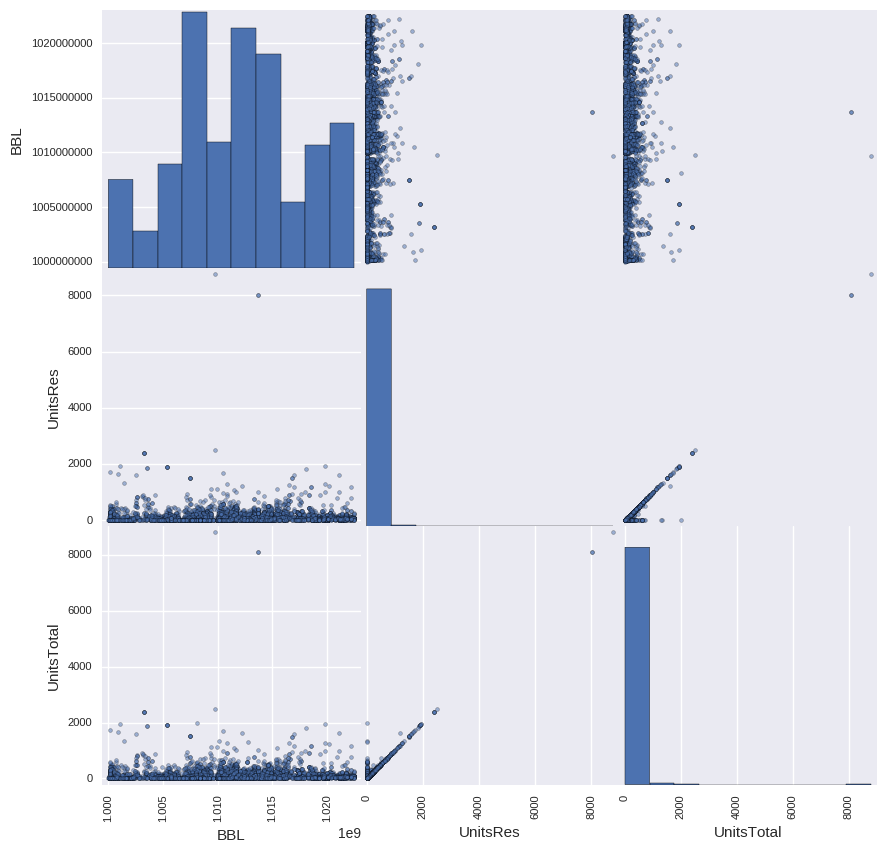

In [112]:
scatter_matrix (bblnrgdata, s=30, figsize=(10, 10))

In [116]:
def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False
    
indy = (np.vectorize(canconvert)(nrg['Site EUI(kBtu/ft2)']))
print ("invalid entries changed to NaN %d"%sum(indy))
nrg['Site EUI(kBtu/ft2)'][~indy] = float('NaN')

invalid entries changed to NaN 16170


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [120]:
indx = (np.vectorize(canconvert)(bblnrgdata['UnitsTotal']))
print ("invalid entries changed to NaN %d"%sum(indx))
bblnrgdata['UnitsTotal'][~indx] = float('NaN')

invalid entries changed to NaN 6492


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


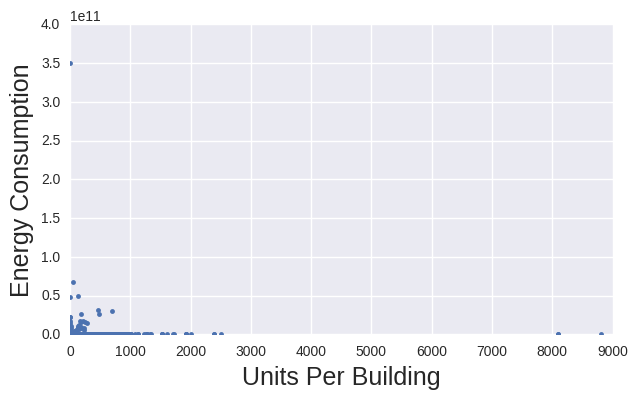

In [121]:
xdata = pd.to_numeric(bblnrgdata['UnitsTotal'],errors="coerce")

# the following calculates the energy use for the whole building
energypersqft = pd.to_numeric(bblnrgdata['Site EUI(kBtu/ft2)'],errors="coerce")
area = pd.to_numeric(bblnrgdata['Reported Property Floor Area (Building(s)) (ft²)'], errors='coerce')
ydata = energypersqft * area

fig, ax = plt.subplots()
fig.set_size_inches(7,4)
ax.plot(xdata, ydata, '.')
ax.set_ylabel('Energy Consumption', fontsize=18)
ax.set_xlabel('Units Per Building', fontsize=18)
plt.show()

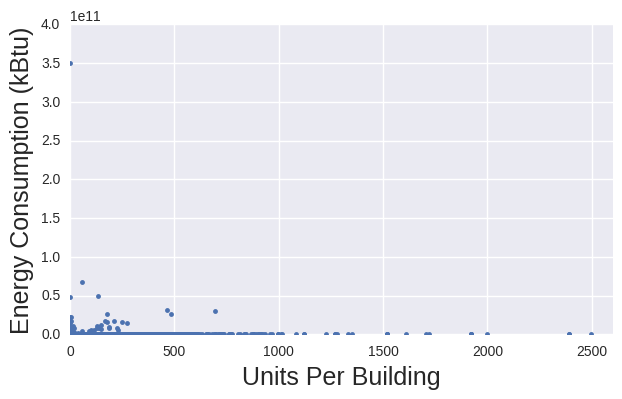

In [122]:
fig, ax = plt.subplots()
fig.set_size_inches(7,4)
ax.plot(xdata, ydata, '.')
ax.set_ylabel('Energy Consumption (kBtu)', fontsize=18)
ax.set_xlabel('Units Per Building', fontsize=18)
# ax.axis([0, 7000, 0, 1])
ax.set_xlim(0,2600)
#ax.set_ylim(0,1)
plt.show()

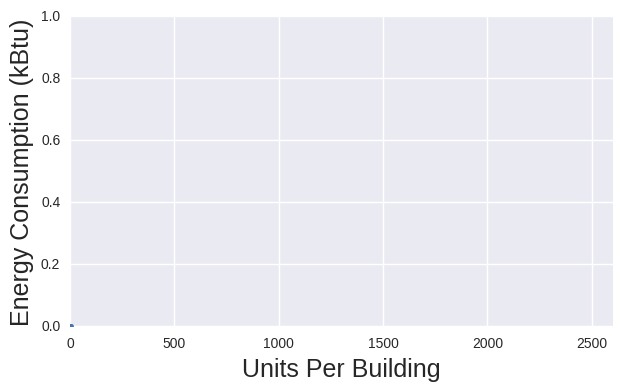

In [123]:
# What's happening? Setting a y limit causes the data to disappear. Even setting the limit for 4, the default above,
# causes the data to disappear. What's happening?
fig, ax = plt.subplots()
fig.set_size_inches(7,4)
ax.plot(xdata, ydata, '.')
ax.set_ylabel('Energy Consumption (kBtu)', fontsize=18)
ax.set_xlabel('Units Per Building', fontsize=18)
# ax.axis([0, 7000, 0, 1])
ax.set_xlim(0,2600)
ax.set_ylim(0,1)
plt.show()

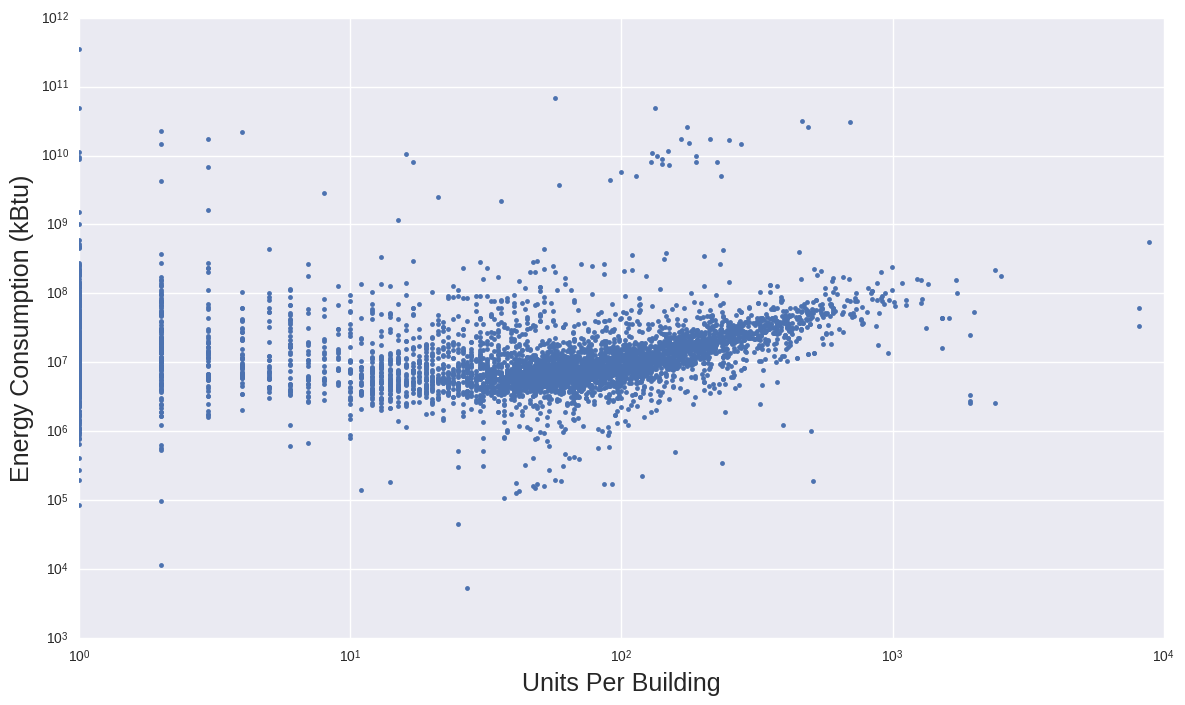

In [124]:
fig, ax = plt.subplots()
fig.set_size_inches(14,8)
ax.loglog(xdata, ydata, '.')
ax.set_ylabel('Energy Consumption (kBtu)', fontsize=18)
ax.set_xlabel('Units Per Building', fontsize=18)
plt.show()

### removing NaN and renaming energy column

In [172]:
bblnrgdata.dropna(axis='rows', inplace=True)
bblnrgdata.rename(columns={'Site EUI(kBtu/ft2)': 'EnergySqFt'}, inplace=True)
bblnrgdata.rename(columns={'Reported Property Floor Area (Building(s)) (ft²)': 'Area'}, inplace=True)
bblnrgdata['TotalEnergy'] = energypersqft * area
bblnrgdata.head()

,BBL,EnergySqFt,Area,UnitsRes,UnitsTotal,TotalEnergy
2,1.013110e+09,125.4,330000,0,56,41382000.0
10,1.010140e+09,154.9,841709,0,2,130380724.1
15,1.007660e+09,122.3,59468,0,8,7272936.4
16,1.008150e+09,117,364000,0,24,42588000.0
18,1.005050e+09,82.1,235370,0,24,19323877.0


In [173]:
# selecting only values over 0
df = bblnrgdata[(bblnrgdata['UnitsTotal'] > 0) & (bblnrgdata['TotalEnergy'] > 0)]
df.drop(['UnitsRes'], axis=1, inplace=True)
df.head()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,BBL,EnergySqFt,Area,UnitsTotal,TotalEnergy
2,1.013110e+09,125.4,330000,56,41382000.0
10,1.010140e+09,154.9,841709,2,130380724.1
15,1.007660e+09,122.3,59468,8,7272936.4
16,1.008150e+09,117,364000,24,42588000.0
18,1.005050e+09,82.1,235370,24,19323877.0


In [134]:
# unsuccessfully plotting new data with only values over 0

# ax = df1.plot.scatter(x=df1.UnitsTotal, y=df1.TotalEnergy, s=30, loglog=True)
# ax.set_ylabel('Energy Consumption (kBtu)', fontsize=18)
# ax.set_xlabel('Units Per Building', fontsize=18)
# ax.set_title('Log plot with adjusted data')
# ax.set_ylim()
# plt.show()

In [131]:
# another unsuccessful attempt

#fig, ax = plt.subplots()
#fig.set_size_inches(14,8)
#ax.loglog(df1.UnitsTotal, df1.TotalEnergy, '.')
#ax.set_ylabel('Energy Consumption (kBtu)', fontsize=18)
#ax.set_xlabel('Units Per Building', fontsize=18)
#ax.set_title('Log plot with adjusted data')
#plt.show()

In [177]:
df['log_units'] = df.UnitsTotal.map(np.log10)
df['log_energy'] = df.TotalEnergy.map(np.log10)

#u_e = sm.OLS(df.log_units, sm.add_constant(log_energy), data = df).fit()
#u_e.summary()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [179]:
X = sm.add_constant(np.log10(df.UnitsTotal))
linmodel = sm.OLS(np.log10(df.TotalEnergy), X, missing='drop').fit()
linmodel.params

const         6.911571
UnitsTotal    0.086466
dtype: float64

TypeError: 'RegressionResultsWrapper' object does not support indexing

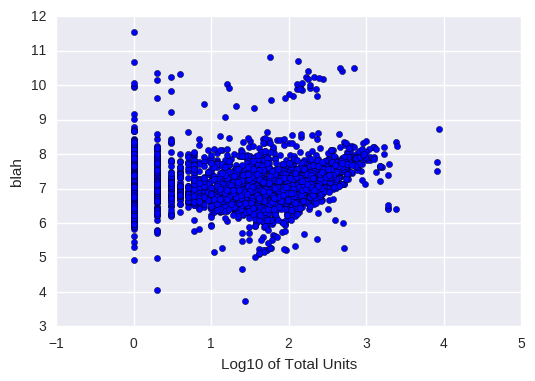

In [181]:
# Scott Smith helped with plotting the linmodel below
fig, ax = plt.subplots()
ax.scatter(df.log_units, df.log_energy)
ax.set_xlabel('Log10 of Total Units')
ax.set_ylabel("blah")
e_u_x = [0., 5.]
e_u_y = [linmodel.params[0] + linmodel[1] * e_u_x[i] for i in range(len(e_u_x))]
plt.show()

#Y = sm.add_constant(np.log10(df.TotalEnergy))
#linmodel = sm.OLS(np.log10(df.UnitsTotal), Y, missing='drop').fit()